## Terms for Use
Solvers are responsible for complying with all terms of use for the data sources they access.  All code in this document is provided using the [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/).  The examples have been tested using Python 3 but have not been tested under Python 2.  Note that data providers may have changed their APIs or data formats after this notebook was published.

### Boring Details
The code cells below set up the notebook environment and load necessary libraries

In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.style.use("seaborn-dark")
import os
import json
import re
from pprint import pprint
import numpy as np
import pandas as pd
from dateutil.parser import parse # To convert strings to timestamps
import warnings
import urllib3
http = urllib3.PoolManager()
GFC_HOME = os.path.abspath("../../..")
auth_file_path = os.path.join(GFC_HOME, "src", "resources", "auth.json")
with open(os.path.join(GFC_HOME, auth_file_path), "r") as f:
    api_key_dict = json.load(f)
data_path = os.path.join(GFC_HOME, "data")

## Google Trends

Some of the IFPs ask about changes in search interest for particular keywords on Google Trends.  There is an unofficial Python API client named [pytrends](https://github.com/GeneralMills/pytrends) that is helpful for accessing Google Trends data programmatically. Documentation for the **pytrends** code is found at that page.

### Example: Trend History for "Brexit"

In this example we will look at how to use **pytrends** to access the search trend history for the term "Brexit".

In [10]:
from pytrends.request import TrendReq

In [18]:
pytrends = TrendReq(hl="en-US")  # Results in US english.

keyword_list = ["Brexit"]
pytrends.build_payload(keyword_list, cat=0, timeframe='today 12-m', geo='', gprop='')

To load a pandas dataframe of search results takes one simple command

In [19]:
brexit_df = pytrends.interest_over_time()
brexit_df.tail()

,Brexit,isPartial
date,,
2019-03-10,83,False
2019-03-17,77,False
2019-03-24,100,False
2019-03-31,73,False
2019-04-07,60,True


The dataframe includes one column for each keyword and a final `isPartial` column that tells whether the week in question is a full 7 days.

We can plot the historical interest over time.

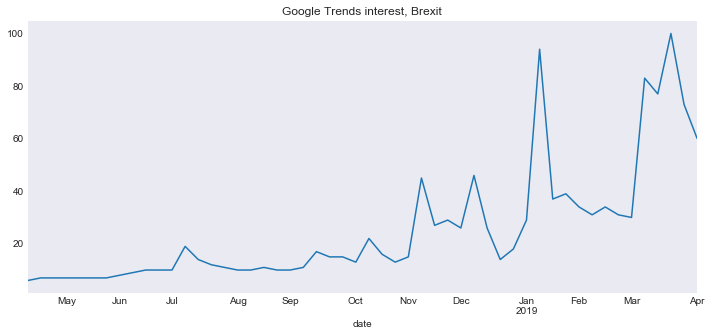

In [20]:
brexit_df["Brexit"].plot(figsize=(12,5), title="Google Trends interest, Brexit");

We can also search on several keywords at the same time and get a common data frame

In [21]:
keyword_list = ["Brexit", "Theresa May", "EU", "UK"]
pytrends.build_payload(keyword_list, cat=0, timeframe='today 12-m', geo='', gprop='')
brexit_plus_df = pytrends.interest_over_time()
brexit_plus_df.tail()

,Brexit,Theresa May,EU,UK,isPartial
date,,,,,
2019-03-10,16,1,19,84,False
2019-03-17,15,1,20,87,False
2019-03-24,19,2,22,87,False
2019-03-31,14,1,20,84,False
2019-04-07,11,1,20,88,True


We can compute the correlation over the search period of interest (in our case, the last 12 months) by using pandas correlation functions.  (We'll drop the `isPartial` column first.)

In [23]:
brexit_plus_df = brexit_plus_df[keyword_list]
brexit_plus_df.corr()

,Brexit,Theresa May,EU,UK
Brexit,1.000000,0.623371,0.062961,0.104828
Theresa May,0.623371,1.000000,0.121853,0.274982
EU,0.062961,0.121853,1.000000,0.192823
UK,0.104828,0.274982,0.192823,1.000000


From this we see that the interest in `Brexit` and `Theresa May` is fairly correlated but the other pairwise correlations are low.

One other interesting thing to look at is the week to week change in search interest.  We can do this by using the pandas `diff` method:

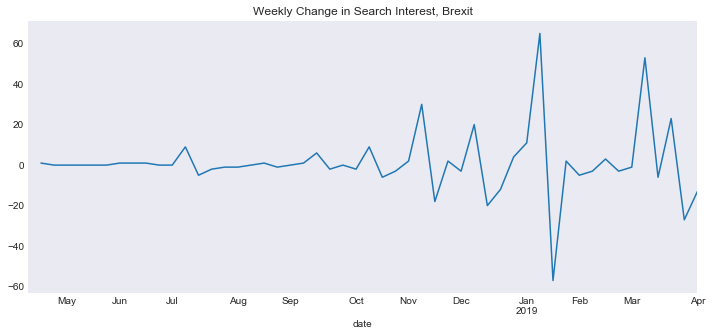

In [25]:
brexit_diff_ser = brexit_df["Brexit"].diff()
brexit_diff_ser.plot(figsize=(12,5), title="Weekly Change in Search Interest, Brexit");